# Credit Card Customer Segmentation
### Using K-means Clustering
#### Santiago Ospina Ferreira

-----------

## Importing Libraries

In [1]:
# Classic imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 

# For building the model
from sklearn.cluster import KMeans

# Bruteforcing K means 
from itertools import combinations

In [71]:
# For preprocessing, remembering that for clustering you always have to normalize the data
from sklearn.preprocessing import StandardScaler

# For Principal Component Analysis (PCA) -> To reduce the number of features
from sklearn.decomposition import PCA

# Analyzing the clusters -> The best is near 1 and the worst is near -1
from sklearn.metrics import silhouette_score

## Reading Data

In [3]:
filePath = "/Users/santiospina/Documents/Machine Learning/Clustering/creditCardClustering/ccGeneral.csv"

df = pd.read_csv(filePath)

print(f"The dataframe has {df.shape[0]} entries and {df.shape[1]} columns (features)")

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Preprocessing

In [6]:
df.set_index('CUST_ID', inplace=True)

In [7]:
nanCount = df.isna().sum()
print(f"Nan count before: \n{nanCount}")

# fill the missing values with the mean
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)  
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True) 

Nan count before: 
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [8]:
nanCount = df.isna().sum()

print(f"Nan count after: \n{nanCount}")

Nan count after: 
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [9]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(df)

In [10]:
print(f"Minimum Minimum Payment: {df['MINIMUM_PAYMENTS'].min()}")
print(f"Maximum Minimum Payment: {df['MINIMUM_PAYMENTS'].max()}")

Minimum Minimum Payment: 0.019163
Maximum Minimum Payment: 76406.20752


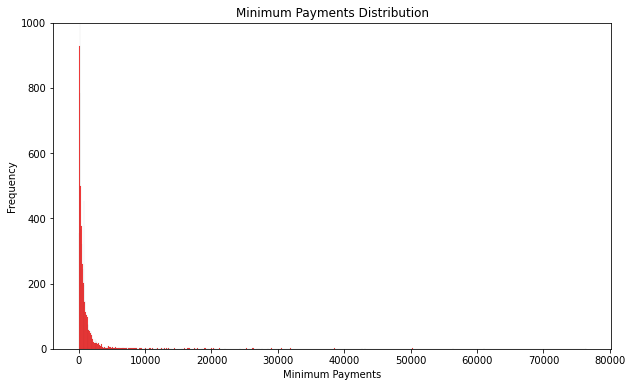

In [11]:
# plot minimum payments

plt.figure(figsize=(10, 6))
sns.histplot(df['MINIMUM_PAYMENTS'], color='red')
plt.title('Minimum Payments Distribution')
plt.xlabel('Minimum Payments')
# plt.xlim(0,77000)
plt.ylim(0,1000)
plt.ylabel('Frequency')
plt.show()

In [12]:
correlationMatrix = df.corr()

Correlation analysis in order to avoid multicolineality

<AxesSubplot:>

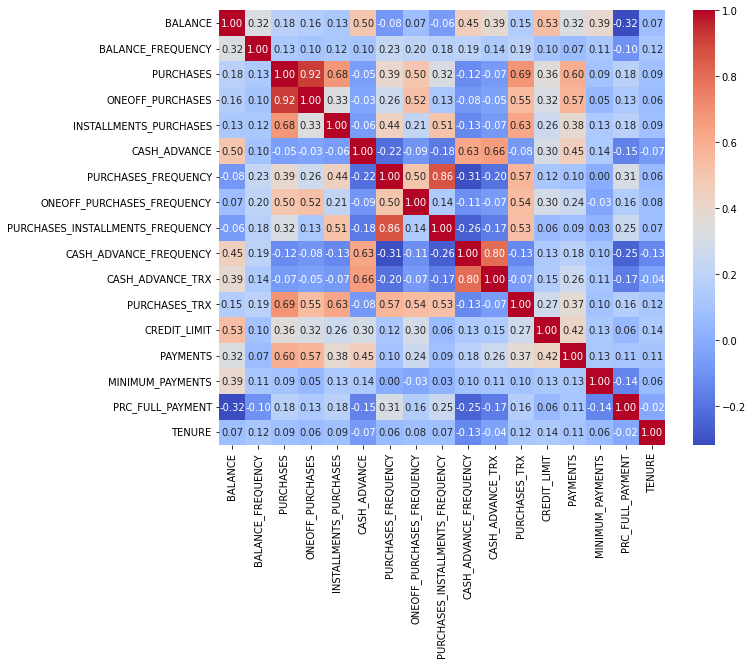

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")

In [14]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(df)

## Clustering

WCSS 

"is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares." 

https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/#:~:text=The%20within%2Dcluster%20sum%20of%20squares%20is%20a%20measure%20of,a%20large%20sum%20of%20squares.

In [15]:
# Elbow Method to determine number of clusters (k)

wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaledData)
    wcss.append(kmeans.inertia_)

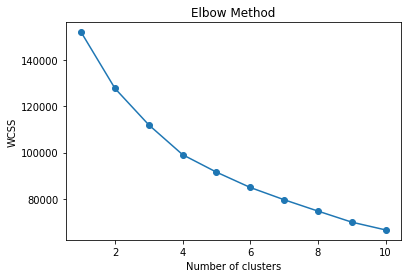

In [16]:
# Lista números de clusters correspondientes a los valores de WCSS
num_clusters = list(range(1, len(wcss) + 1))

# Graficar WCSS en función del número de clusters
plt.plot(num_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### K Means

In [17]:
valoresSiluetas = []

for k in range(2,20):

    kmeans = KMeans(n_clusters = k , init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaledData)

    clusterLabels = kmeans.labels_
    silhouette_avg = silhouette_score(df, clusterLabels)
    valoresSiluetas.append(silhouette_avg)

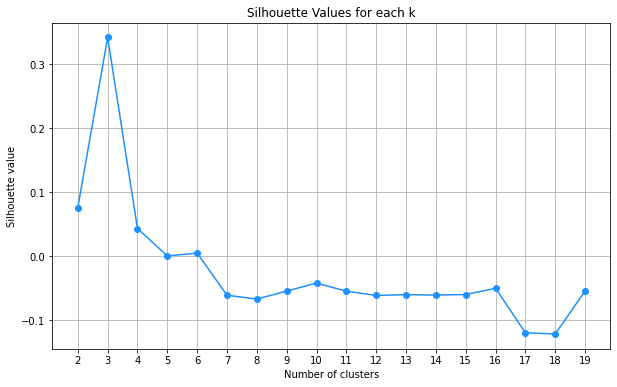

In [18]:
# Plotting the Silhouette values for each k

plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(range(2, len(valoresSiluetas)+2), valoresSiluetas, marker='o', color='dodgerblue')
plt.title('Silhouette Values for each k')
plt.xlabel('Number of clusters')
plt.xticks(range(2, len(valoresSiluetas) + 2))
plt.ylabel('Silhouette value')
plt.show()

In [19]:
# The one with highest silhouette score is the best in this case

# + 2 because the range starts at 2

kOptimo = valoresSiluetas.index(max(valoresSiluetas)) + 2

print(f"Numero de clusters elegidos: {kOptimo}")

Numero de clusters elegidos: 3


From scikit-learn documentation: ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [20]:
# Usando K means para clusterizar

kmeans = KMeans(n_clusters=kOptimo, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Ajustar el modelo a los datos estandarizados
kmeans.fit(scaledData)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [21]:
# ANALIZAR 

clusterLabels = kmeans.labels_

# Adding "Cluster" column to the df in order to identify in which cluster does the customer belong to
df['Cluster'] = clusterLabels

In [22]:
display(df.head(20))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1
C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1


In [23]:
silhouette_avg = silhouette_score(df, clusterLabels)
print(f"El coeficiente de Silueta es: {silhouette_avg}")

El coeficiente de Silueta es: 0.3418489202110138


In [120]:
df['Cluster'] = clusterLabels
df.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1
C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1


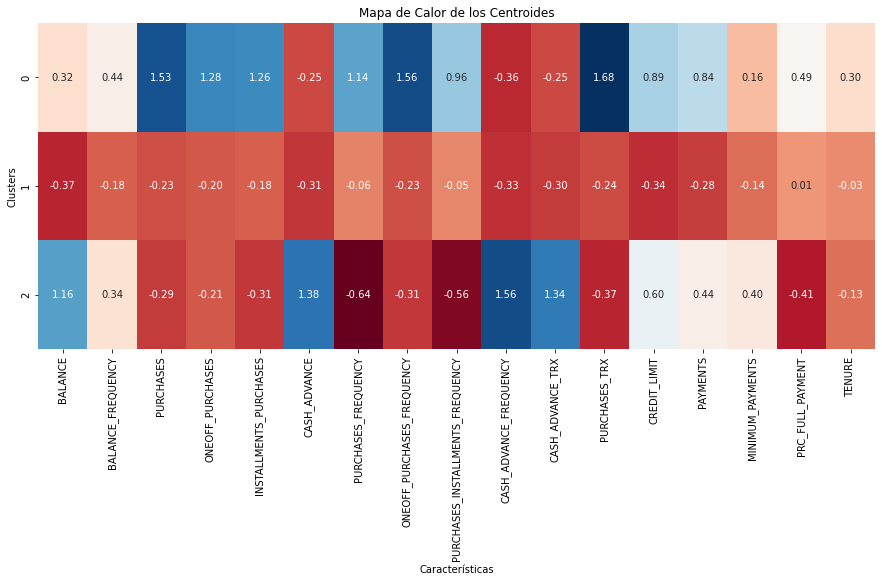

In [25]:
# Obtiene centroides de los clusters
centroids = kmeans.cluster_centers_

features = df.columns[df.columns != 'Cluster'].tolist()

# Mapa de calor de los centroides
plt.figure(figsize=(15, 6))
sns.heatmap(centroids, cmap='RdBu', annot=True, fmt='.2f', cbar=False, xticklabels=features)
plt.title('Mapa de Calor de los Centroides')
plt.xlabel('Características')
plt.ylabel('Clusters')
plt.show()

Cuando K = 3 

0 : Buena capacidad de compra, impulsivo y responsable (paga bastante)

1 : Balanceado, limite credito normal 

2 : Conservador, alta capacidad (buen balance), paga mucho en cash, poca compra impulsiva

Cuando K = 4 

0 : Balanceado, limite credito normal 

1 : Conservador, responsable, buen balance, poca compra impulsiva

2 : Buena capacidad de compra, responsable (paga bastante) e impulsivo

3 : Bajo credito y poca compra

## Dimensionality Reduction 

Using Principal Component Analysis (PCA)

In [72]:
df_pca = df.drop(columns=['Cluster'])
df_pca.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [112]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Create a PCA instance
pca = PCA(n_components=7)

# Fit the PCA to the scaled data
pca.fit(df_scaled)

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to inspect the explained variance for each component
explained_variance_df = pd.DataFrame({'Explained Variance': explained_variance}, index=[f'PC{i+1}' for i in range(len(explained_variance))])


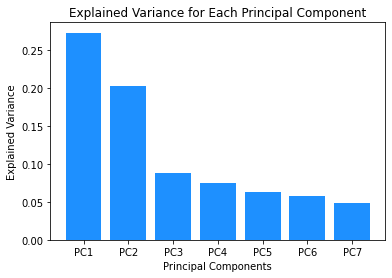

In [113]:
# Plot the explained variance
plt.bar(explained_variance_df.index, explained_variance_df['Explained Variance'], color = 'dodgerblue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Each Principal Component')
plt.show()

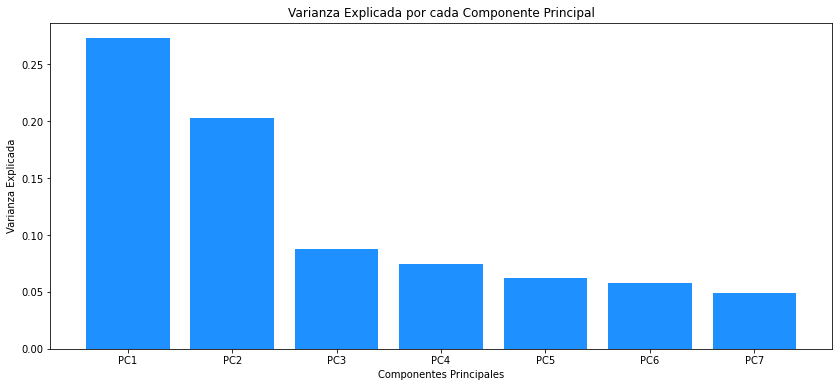

In [114]:
# Plot the explained variance
plt.figure(figsize=(14, 6))
plt.bar(explained_variance_df.index, explained_variance_df['Explained Variance'], color = 'dodgerblue')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por cada Componente Principal')
plt.show()

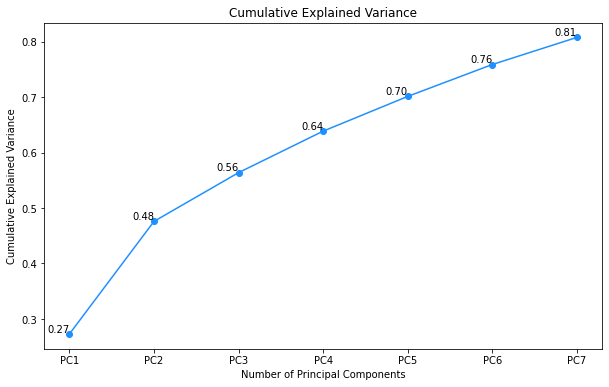

In [115]:
# You can also calculate the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()
cumulative_explained_variance_df = pd.DataFrame({'Cumulative Explained Variance': cumulative_explained_variance}, index=[f'PC{i+1}' for i in range(len(explained_variance))])

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance_df.index, cumulative_explained_variance_df['Cumulative Explained Variance'], marker='o', color='dodgerblue')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

for x, y in zip(cumulative_explained_variance_df.index, cumulative_explained_variance_df['Cumulative Explained Variance']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.title('Cumulative Explained Variance')
plt.show()

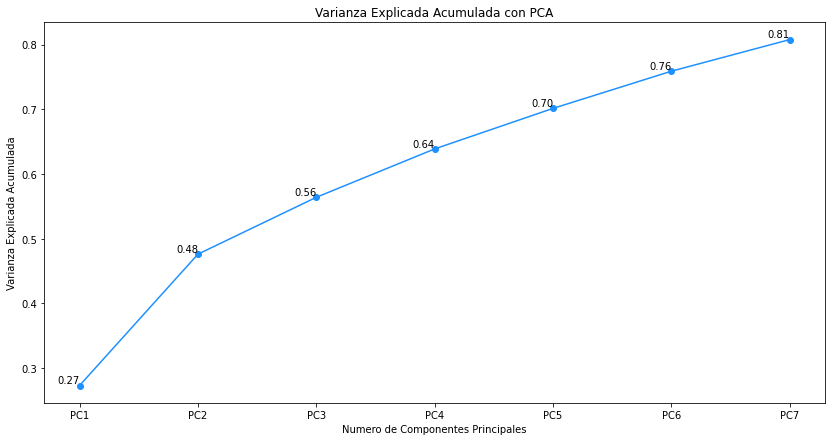

In [119]:
# You can also calculate the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()
cumulative_explained_variance_df = pd.DataFrame({'Cumulative Explained Variance': cumulative_explained_variance}, index=[f'PC{i+1}' for i in range(len(explained_variance))])

# Plot the cumulative explained variance
plt.figure(figsize=(14, 7))
plt.plot(cumulative_explained_variance_df.index, cumulative_explained_variance_df['Cumulative Explained Variance'], marker='o', color='dodgerblue')
plt.xlabel('Numero de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')

for x, y in zip(cumulative_explained_variance_df.index, cumulative_explained_variance_df['Cumulative Explained Variance']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.title('Varianza Explicada Acumulada con PCA')
plt.show()

In [89]:
# Get the loadings of each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=df_pca.columns, index=[f'PC{i+1}' for i in range(len(loadings))])

# Print the loadings
print("Loadings of each principal component:")
loadings_df

Loadings of each principal component:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PC1,0.101077,0.120043,0.411642,0.346407,0.336814,-0.023343,0.321493,0.294633,0.274710,-0.089139,-0.048654,0.390695,0.211663,0.266249,0.060351,0.132112,0.081021
PC2,0.403957,0.130537,0.041038,0.062872,-0.018533,0.439242,-0.190780,-0.017924,-0.178601,0.434082,0.419734,-0.019394,0.238678,0.257476,0.166970,-0.190026,-0.004326
PC3,-0.160075,-0.420630,0.257903,0.392115,-0.110488,-0.027345,-0.374691,0.115131,-0.473409,-0.109072,-0.115541,-0.077331,0.100483,0.276237,-0.221635,0.124774,-0.064326
PC4,0.283454,0.149742,0.039111,0.078155,-0.051130,-0.254586,-0.188975,0.027465,-0.215002,-0.264228,-0.326924,-0.018109,0.131651,-0.114767,0.402909,-0.424426,0.435285
PC5,0.047603,-0.484563,0.031287,-0.155846,0.360266,0.096677,-0.092435,-0.531553,0.180203,-0.137405,-0.078310,-0.030279,0.073304,0.193768,0.431342,0.136174,-0.038903
PC6,0.039897,0.035317,0.176295,0.184610,0.077674,-0.146755,-0.037226,0.024754,-0.052384,0.065945,-0.057788,0.103758,-0.321058,-0.126917,0.276397,-0.357247,-0.747012
PC7,-0.252376,0.104751,0.203290,0.121706,0.257153,-0.050042,-0.156066,-0.290682,0.036313,0.141515,0.193868,0.106832,-0.558932,0.160003,-0.195378,-0.296506,0.396576


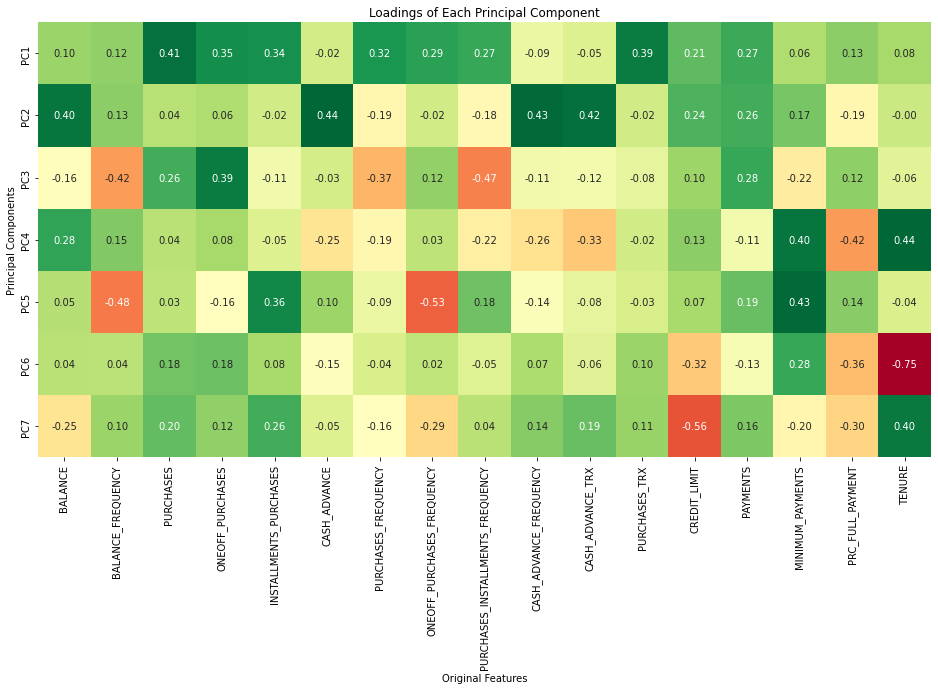

In [107]:
plt.figure(figsize=(16, 8))
sns.heatmap(loadings_df, annot=True, cmap='RdYlGn', fmt=".2f", cbar=False)
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings of Each Principal Component')
plt.show()

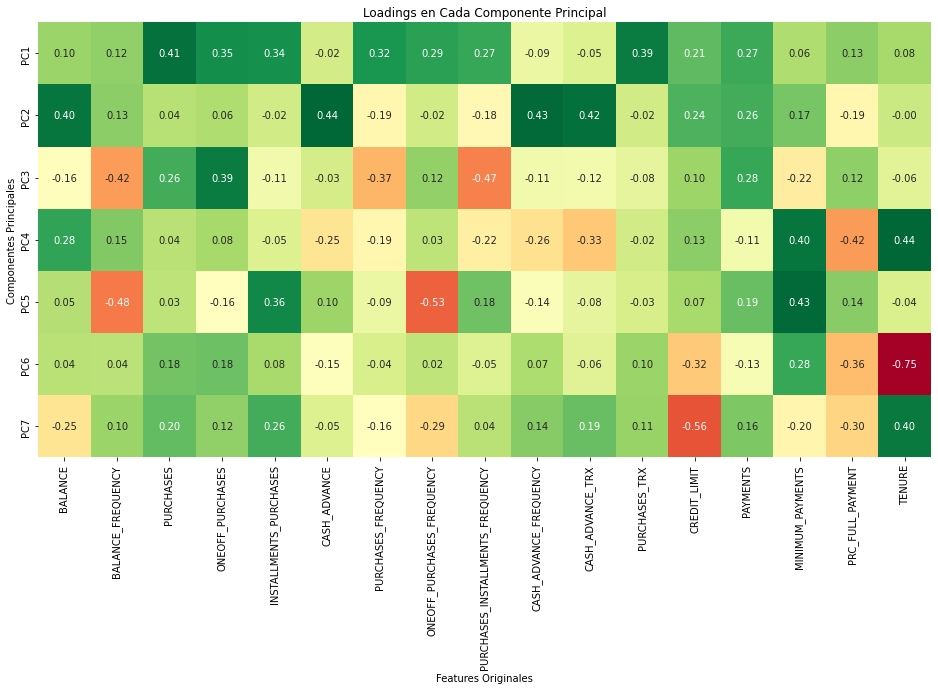

In [106]:
plt.figure(figsize=(16, 8))
sns.heatmap(loadings_df, annot=True, cmap='RdYlGn', fmt=".2f", cbar=False)
plt.xlabel('Features Originales')
plt.ylabel('Componentes Principales')
plt.title('Loadings en Cada Componente Principal')
plt.show()

## Brute Force Best Silhouette Score K-Means EXPERIMENT

NOT FINISHED YET!!!! WORK IN PROGRESS!!!!!

Without feature engineering or dimensionality reduction, just completely bruteforcing and selecting the highest Silhouette Score

I was just curious about it

In [26]:
# Returns a list with all the combinations of r elements in a list of features
def feature_combinations(features, r):
    if r > len(features):
        print(f"It is not possible to form combinations of {r} elements in a list of {len(features)} elements")
        return [] 
    # using combinations tool from itertools
    return list(combinations(features, r))

# Returns the optimal number of clusters using highest silhouette score
def silhouette_optimal_k(df, scaled_data):
    silhouette_values = []

    for k in range(2,11):

        kmeans = KMeans(n_clusters = k , init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(scaled_data)

        clusterLabels = kmeans.labels_
        silhouette_avg = silhouette_score(df, clusterLabels)
        silhouette_values.append(silhouette_avg)

    return np.argmax(silhouette_values) + 2

# Returns dataframe with specific features
def df_with_features(df, features):
    # receiving features as a list
    return df[features]

In [30]:
total_feature_combinations = []

for r in range(2, len(features) + 1):
    combination_of_features = feature_combinations(features, r)
    # transform to list and extends
    combination_of_features = list(map(list, combination_of_features))
    total_feature_combinations.extend((combination_of_features)) 

print(f"Total number of combinations: {len(total_feature_combinations)}")

Total number of combinations: 131054


In [35]:
brute_silhouette_score_list = []
brute_number_of_clusters = []

for features in total_feature_combinations:
    # Get the dataframe with the features
    brute_df = df_with_features(df, features)

    # Scale the data
    brute_scaledData = scaler.fit_transform(brute_df)
    brute_optimal_k = silhouette_optimal_k(brute_df, brute_scaledData)
    # save number of clusters
    brute_number_of_clusters.append(brute_optimal_k)

    # Clustering
    kmeans = KMeans(n_clusters=brute_optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(brute_scaledData)
    cluster_labels = kmeans.labels_

    # Quality of the clustering using silhouette score
    silhouette_value = silhouette_score(brute_df, clusterLabels)
    # save silhouette score
    brute_silhouette_score_list.append(silhouette_value)

KeyboardInterrupt: 

In [43]:
list(brute_df.columns)

['BALANCE', 'ONEOFF_PURCHASES']

In [45]:
brute_number_of_clusters2 = []
brute_silhouette_score_list2 = []
execution_time_list = []

for features in total_feature_combinations:
    # Get the dataframe with the features
    brute_df = df_with_features(df, features)

    print(f"---- FEATURES: {list(brute_df.columns)}")

    # Scale the data
    brute_scaledData = scaler.fit_transform(brute_df)
    brute_optimal_k = silhouette_optimal_k(brute_df, brute_scaledData)
    # save number of clusters
    print(f"Optimal k: {brute_optimal_k}")
    brute_number_of_clusters2.append(brute_optimal_k)

    # Clustering
    kmeans = KMeans(n_clusters=brute_optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(brute_scaledData)
    cluster_labels = kmeans.labels_

    # Quality of the clustering using silhouette score
    silhouette_value = silhouette_score(brute_df, clusterLabels)
    # save silhouette score
    print(f"Silhouette score: {silhouette_value:.4f}\n")
    brute_silhouette_score_list2.append(silhouette_value)

---- FEATURES: ['BALANCE', 'BALANCE_FREQUENCY']
Optimal k: 4
Silhouette score: 0.2843

---- FEATURES: ['BALANCE', 'PURCHASES']
Optimal k: 2
Silhouette score: 0.3951

---- FEATURES: ['BALANCE', 'ONEOFF_PURCHASES']
Optimal k: 2
Silhouette score: 0.3864

---- FEATURES: ['BALANCE', 'INSTALLMENTS_PURCHASES']
Optimal k: 2
Silhouette score: 0.3417

---- FEATURES: ['BALANCE', 'CASH_ADVANCE']
Optimal k: 2
Silhouette score: 0.2743

---- FEATURES: ['BALANCE', 'PURCHASES_FREQUENCY']
Optimal k: 3
Silhouette score: 0.2843

---- FEATURES: ['BALANCE', 'ONEOFF_PURCHASES_FREQUENCY']
Optimal k: 4
Silhouette score: 0.2843

---- FEATURES: ['BALANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY']
Optimal k: 4
Silhouette score: 0.2843

---- FEATURES: ['BALANCE', 'CASH_ADVANCE_FREQUENCY']
Optimal k: 2
Silhouette score: 0.2843

---- FEATURES: ['BALANCE', 'CASH_ADVANCE_TRX']
Optimal k: 2
Silhouette score: 0.2843

---- FEATURES: ['BALANCE', 'PURCHASES_TRX']
Optimal k: 2
Silhouette score: 0.2848

---- FEATURES: ['BALANCE',

KeyboardInterrupt: 

In [46]:
# Open the .txt file in write mode
with open("results.txt", "w") as f:

    for features in total_feature_combinations:
        # Get the dataframe with the features
        brute_df = df_with_features(df, features)

        print(f"---- FEATURES: {list(brute_df.columns)}")

        # Scale the data
        brute_scaledData = scaler.fit_transform(brute_df)
        brute_optimal_k = silhouette_optimal_k(brute_df, brute_scaledData)
        # save number of clusters
        print(f"Selected k: {brute_optimal_k}")
        brute_number_of_clusters2.append(brute_optimal_k)

        # Clustering
        kmeans = KMeans(n_clusters=brute_optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(brute_scaledData)
        cluster_labels = kmeans.labels_

        # Quality of the clustering using silhouette score
        silhouette_value = silhouette_score(brute_df, clusterLabels)
        # save silhouette score
        print(f"Silhouette score: {silhouette_value:.4f}\n")
        brute_silhouette_score_list2.append(silhouette_value)

        # Write the results to the .txt file
        f.write(f"{brute_optimal_k}, {silhouette_value:.4f},{features}\n")

---- FEATURES: ['BALANCE', 'BALANCE_FREQUENCY']
Selected k: 4
Silhouette score: 0.2843

---- FEATURES: ['BALANCE', 'PURCHASES']
Selected k: 2
Silhouette score: 0.3951

---- FEATURES: ['BALANCE', 'ONEOFF_PURCHASES']
Selected k: 2
Silhouette score: 0.3864

---- FEATURES: ['BALANCE', 'INSTALLMENTS_PURCHASES']
Selected k: 2
Silhouette score: 0.3417

---- FEATURES: ['BALANCE', 'CASH_ADVANCE']


KeyboardInterrupt: 

In [47]:
import csv

In [59]:
def delete_already_iterated_features(total_feature_combinations, results_file="results.csv"):
  """
  Deletes the already iterated features combinations from the list of total feature combinations.

  Args:
    total_feature_combinations: A list of all possible combinations of features.
    results_file: The path to the file where the results are saved.

  Returns:
    A list of all possible combinations of features, except for the ones that have already been iterated.
  """

  # Read the results file to get the list of already iterated features combinations.
  with open(results_file, "r") as f:
    reader = csv.reader(f)
    already_iterated_features = []
    for row in reader:
      features = row[2]
      already_iterated_features.append(features)

  # Remove the already iterated features combinations from the list of total feature combinations.
  updated_total_feature_combinations = []
  for feature_combination in total_feature_combinations:
    if feature_combination not in already_iterated_features:
      updated_total_feature_combinations.append(features)

  return updated_total_feature_combinations

def brute_force_clustering(df, total_feature_combinations, scaler, silhouette_optimal_k, results_file="results.csv"):
  """
  Performs brute-force k-means clustering on all possible combinations of features.

  Args:
    df: A pandas DataFrame containing the data.
    total_feature_combinations: A list of all possible combinations of features.
    scaler: A scaler object to scale the data.
    silhouette_optimal_k: A function that takes a pandas DataFrame and a scaled DataFrame as input and returns the optimal number of clusters for the data.
    results_file: The path to the file where the results will be saved.

  """

  with open(results_file, "a", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Optimal k", "Silhouette score", "Features"])
    for features in total_feature_combinations:
      # Get the dataframe with the features
      brute_df = df_with_features(df, features)

      # Scale the data
      brute_scaledData = scaler.fit_transform(brute_df)

      # Compute the optimal number of clusters
      brute_optimal_k = silhouette_optimal_k(brute_df, brute_scaledData)

      # Perform k-means clustering
      kmeans = KMeans(n_clusters=brute_optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
      kmeans.fit(brute_scaledData)
      cluster_labels = kmeans.labels_

      # Compute the silhouette score
      silhouette_value = silhouette_score(brute_df, cluster_labels)

      # Write the results to the file
      writer.writerow([brute_optimal_k, silhouette_value, features])

In [60]:
# Delete already iterated features
features_to_iterate = delete_already_iterated_features(total_feature_combinations, results_file="results.csv")

# Perform brute-force clustering on remaining feature combinations
brute_force_clustering(df, features_to_iterate, scaler, silhouette_optimal_k, results_file="results.csv")

KeyError: 'Features'